<a href="https://colab.research.google.com/github/MarioSigal/Procesamiento-de-Imagenes/blob/main/Clase_Expositiva_de_Fourrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 7: Fourier**

### Configuracion

In [1]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

from skimage.draw import rectangle, line
from skimage.transform import rotate
from skimage.util import img_as_float
from skimage import data, color,transform
import skimage.io as io

import os

### Ejemplo de Numeros Imaginarios

In [2]:
x = 5
y = 3

# creamos a z = x + iy
z = x + 1j * y

# imprimimos la parte Real e Imaginaria. T
print("La parte real del numero es:", z.real)
print("La parte imaginaria del numero es:", z.imag)

print()

# Numpy tambien acepta operar con numeros complejos
arregloReales = np.random.randint(size=4,low=-10, high=10)
arregloImaginarios = np.random.randint(size=4,low=-10, high=10) * 1j
arregloComplejo = arregloReales + arregloImaginarios

print("Arreglo Complejo")
print(arregloComplejo)

print("Parte Real")
print(np.real(arregloComplejo))

print("Parte Imaginaria")
print(np.imag(arregloComplejo))


La parte real del numero es: 5.0
La parte imaginaria del numero es: 3.0

Arreglo Complejo
[-1.-2.j  6.+8.j -9.+0.j -9.-8.j]
Parte Real
[-1.  6. -9. -9.]
Parte Imaginaria
[-2.  8.  0. -8.]


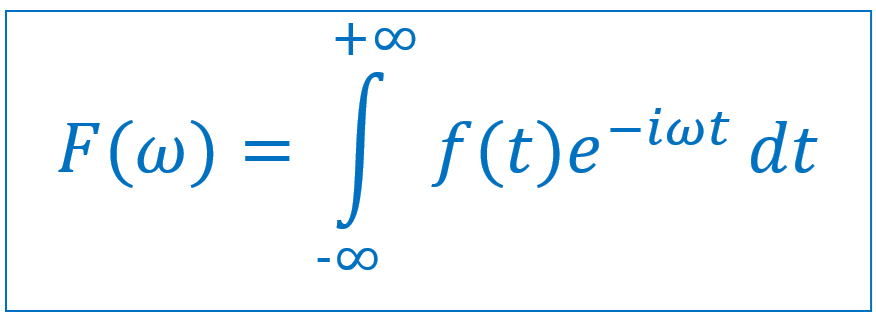

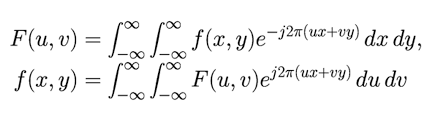

### 1. Graficar las bases de la Transformada de Fourier de dimensión 8 en 1-D y de dimensión 8 × 8 en 2-D

/tmp/ipython-input-540665194.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


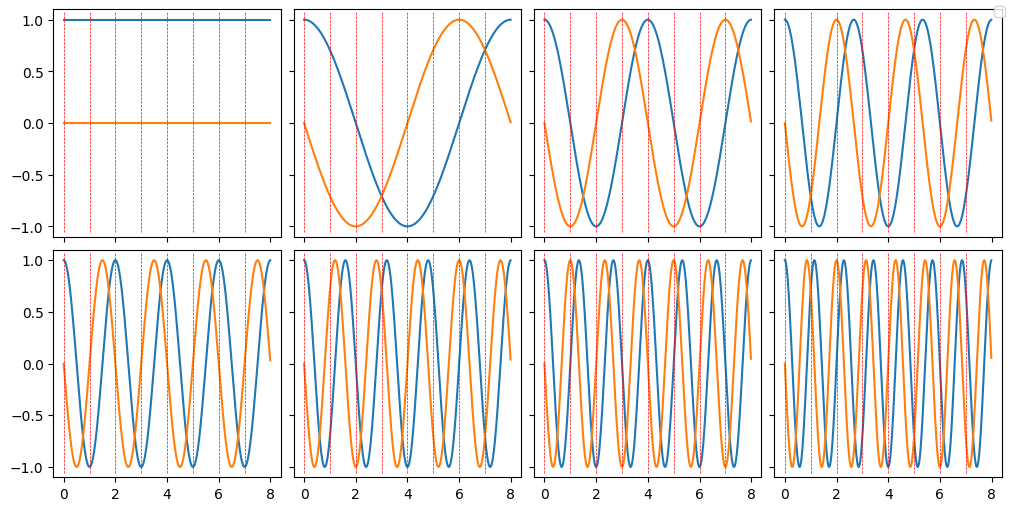

In [3]:
#Numero de Muestras de la senal
N = 8

#Opciones para graficar
#Velocidad del sampleo
sampleoRate = 1/100
#Cuantos sampleos se haran
sampleoGrafico = int(N/sampleoRate)

#Inicializamos un arreglo para guardar cada base y su evolucion
bases1D = np.zeros((N,sampleoGrafico)) * 1j

#Recorremos cada frecuencia
for frecuencia in range(0,N):
  for i in range(sampleoGrafico):
    # Por cada vemos como avanza en el tiempo para luego plotearla
    t = i*sampleoRate
    frecuenciaAngular = ((2*np.pi)/N) * (frecuencia);
    # Calculamos la parte real e imaginaria de la base.
    bases1D[frecuencia][i] = math.cos(frecuenciaAngular * t) - 1j*(math.sin(frecuenciaAngular * t))

fig, axes = plt.subplots(2,4, figsize=(10, 5),sharex=True, sharey=True, layout="constrained")
for base in range(N):
  axes[base//4][base%4].plot(np.arange(0,sampleoGrafico*sampleoRate,sampleoRate),np.real(bases1D[base]))
  axes[base//4][base%4].plot(np.arange(0,sampleoGrafico*sampleoRate,sampleoRate),np.imag(bases1D[base]))
  for sample in range(N):
    # Mostramos que valor tiene cada base al momento del sampleo de las N.
    axes[base//4][base%4].axvline(x = sample, ymin=0.02, ymax=0.99  , color = 'r', ls='--', lw=0.5)

fig.legend()


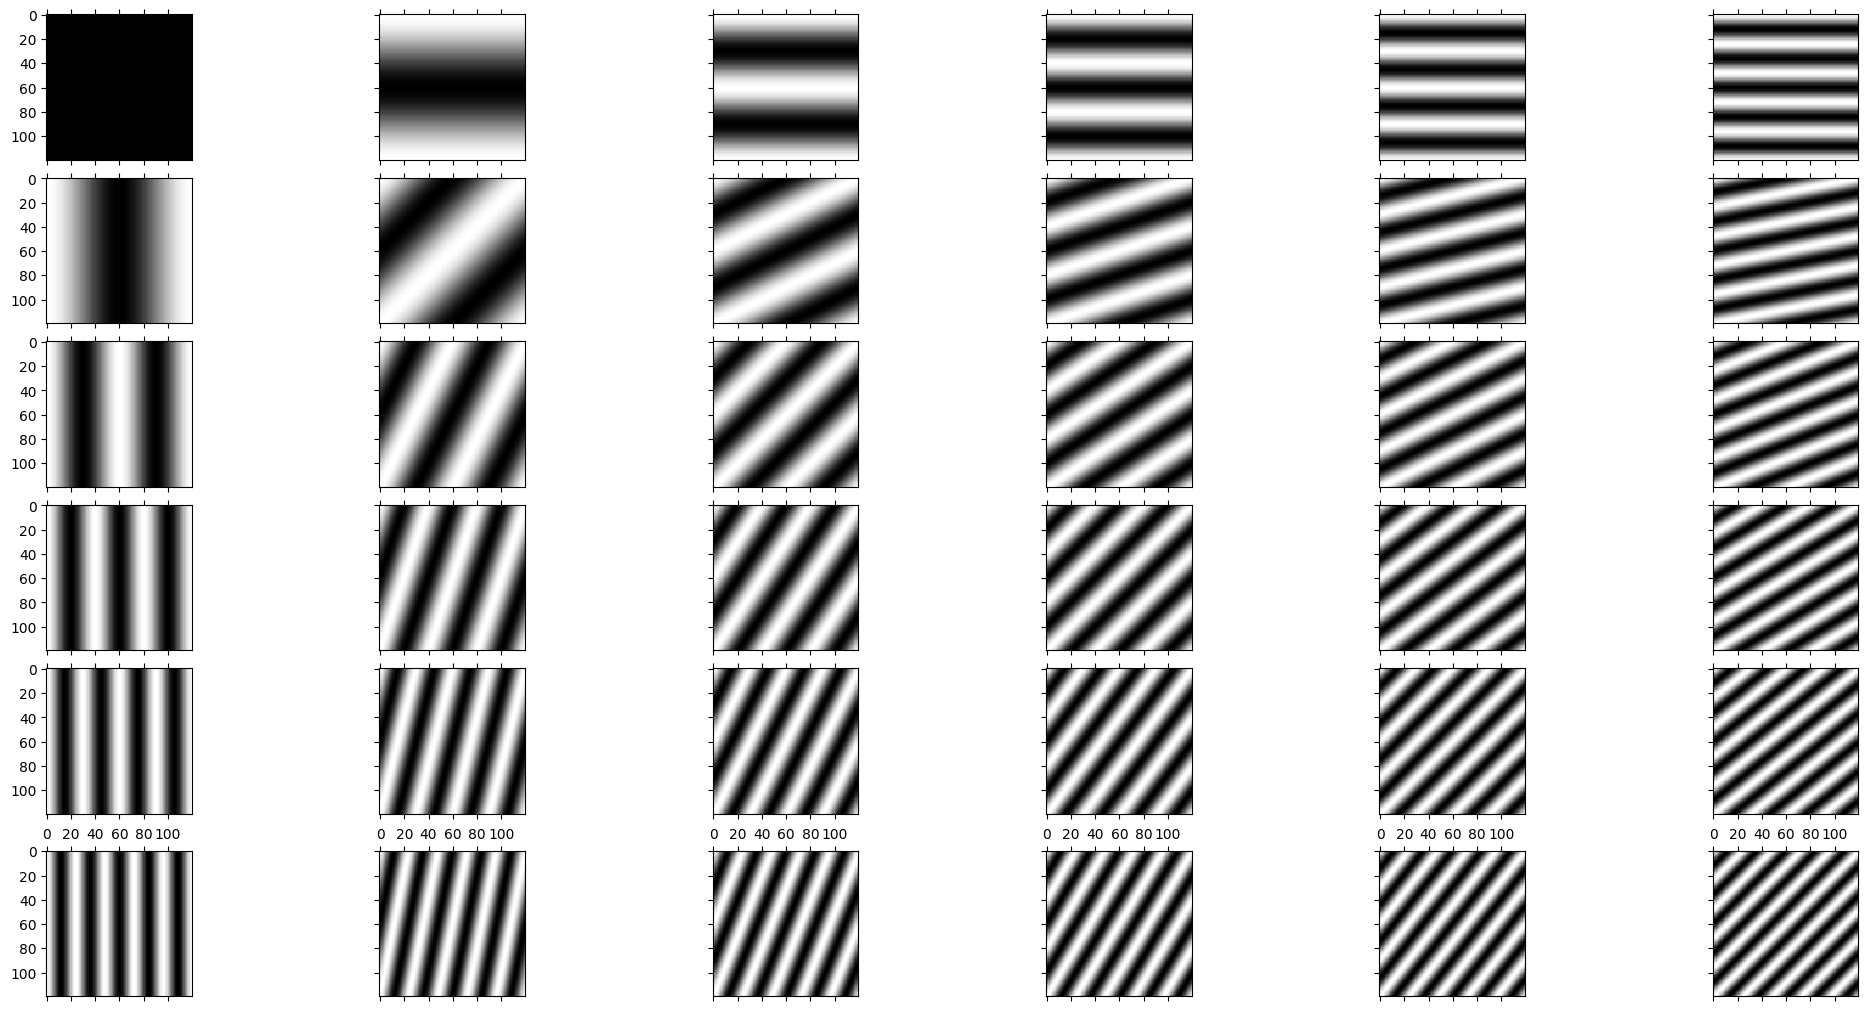

In [36]:
# Ploteo de las bases en 2D
#Definimos el sampleo horizontal y vertical
N = 6
M = 6
#Configuramos los valores para graficar
sampleoRate = 1/20
sampleoGrafico = int(N/sampleoRate)

#Ahora nuestras bases seran matrices, no arreglos
bases2D = np.zeros((N,M,sampleoGrafico,sampleoGrafico)) * 1j

for frecuenciaX in range(0,N):
  for frecuenciaY in range(0,M):
    for intervaloX in range(sampleoGrafico):
      for intervaloY in range(sampleoGrafico):
        # Calculamos como la base avanza en el tiempo y guardamos su valor
        tX = intervaloX*sampleoRate
        tY = intervaloY*sampleoRate
        frecuenciaAngularX = ((2*np.pi)/N) * (frecuenciaX)
        frecuenciaAngularY = ((2*np.pi)/M) * (frecuenciaY)
        angulo = frecuenciaAngularX * tX + frecuenciaAngularY * tY
        bases2D[frecuenciaX][frecuenciaY][intervaloY][intervaloX] = math.cos(angulo) - 1j*(math.sin(angulo))

fig, axes = plt.subplots(N,M, figsize=(20, 10),sharex=True, sharey=True, layout="constrained")
for baseX in range(N):
  for baseY in range(M):
    axes[baseX][baseY].matshow(np.real(bases2D[baseX][baseY]),cmap=plt.cm.gray)

### Implementar la DFT en 1D

Visualizacion interactiva entre la relacion de los numeros complejos y los caminos circulares: [betterexplained.com](https://betterexplained.com/examples/fourier/)

In [8]:
"""La funcion debe devolver un arreglo con la magnitud de la frecuencia y tambien su Fase"""
def DFT_1D(senal):
    N = len(senal)
    dft = np.zeros(N, dtype=complex)
    for k in range(N):
        sum_val = 0
        for n in range(N):
            sum_val += senal[n] * cmath.exp(-2j * cmath.pi * k * n / N)
        dft[k] = sum_val
    magnitud = np.abs(dft)
    fase = np.angle(dft)
    return magnitud, fase


def IDFT_1D(senalModulo, senalFase):
    N = len(senalModulo)
    idft = np.zeros(N, dtype=complex)
    frecuenciasComplejas = senalModulo * np.exp(1j * senalFase)
    for n in range(N):
        sum_val = 0
        for k in range(N):
            sum_val += frecuenciasComplejas[k] * cmath.exp(2j * cmath.pi * k * n / N)
        idft[n] = sum_val / N
    return np.real(idft)

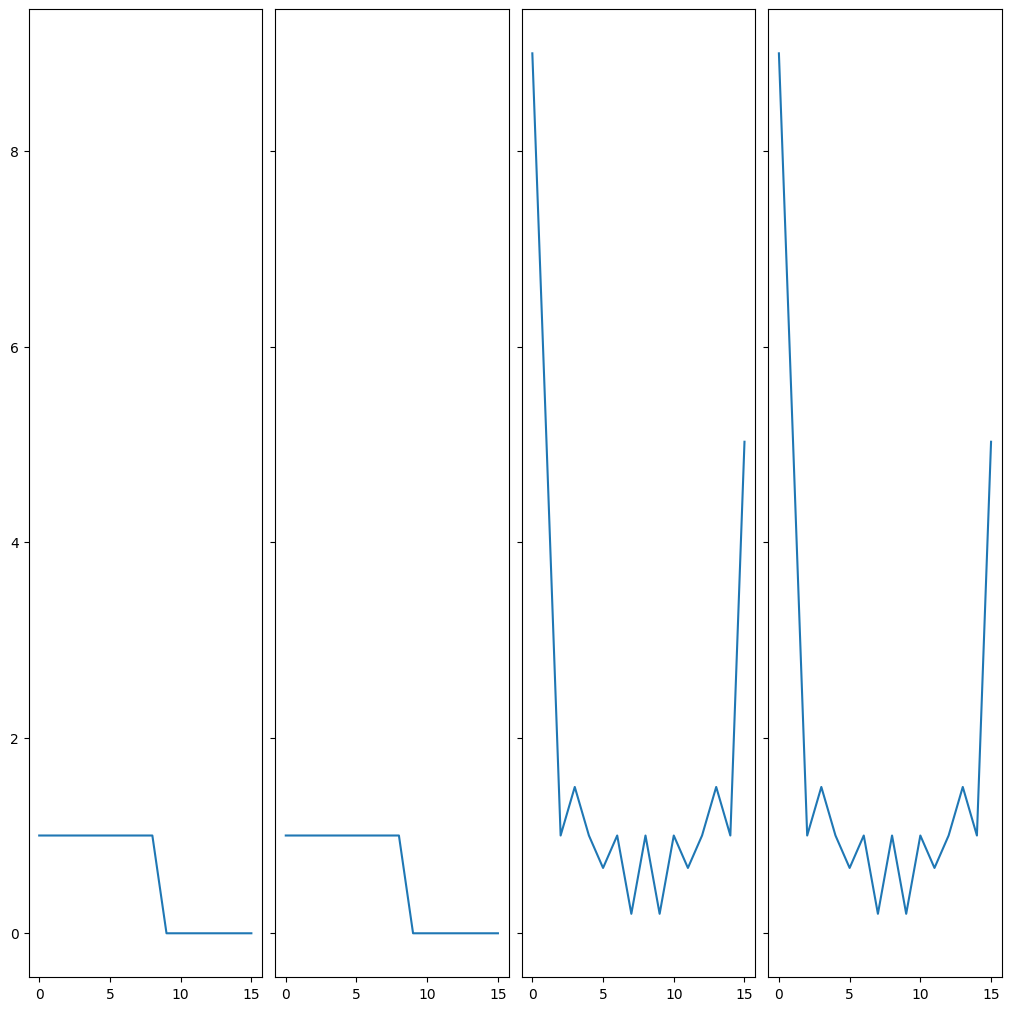

In [10]:
senal = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
senalModulo, senalFase = DFT_1D(senal)

## Suprimir Frecuencias Altas
senalModuloSinAltas = np.copy(senalModulo)
senalSinAltas = IDFT_1D(senalModuloSinAltas,senalFase)

## Suprimir Frecuencias Intermedias
senalModuloSinIntermedias = np.copy(senalModulo)
senalSinAltas = IDFT_1D(senalModuloSinIntermedias,senalFase)

## Suprimir Frecuencias Bajas
senalModuloSinBajas = np.copy(senalModulo)
senalSinAltas = IDFT_1D(senalModuloSinBajas,senalFase)


fig, axes = plt.subplots(1, 4, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")
axes[0].plot(range(senal.shape[0]), senal)
axes[1].plot(range(senal.shape[0]), senalSinAltas)
axes[2].plot(range(senal.shape[0]), senalModuloSinIntermedias)
axes[3].plot(range(senal.shape[0]), senalModuloSinBajas)
plt.show()


## **Funciones Auxiliares DFT 2D**

In [11]:
def log_filter(image):
  image_float = img_as_float(image)
  c = 1.0 / np.log(2 + np.max(image_float))
  log_transformed_image = c * np.log(1 + image_float)
  return log_transformed_image

def mostrarDFTyIDFT(imagenOriginal, title = ""):
  ## Aplicar DFS a la imagen
  dfsImagenMagnitud, dfsImagenPhase = DFT_2D(imagenOriginal)
  imagenReconstruida = IDFT_2D(dfsImagenMagnitud, dfsImagenPhase)

  fig, axes = plt.subplots(2,2, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")
  fig.suptitle(title, fontsize=16)

  axes[0][0].matshow(imagenOriginal, cmap=plt.cm.gray)
  axes[0][1].matshow(log_filter(dfsImagenMagnitud), cmap=plt.cm.gray)
  axes[1][0].matshow(dfsImagenPhase, cmap=plt.cm.gray)
  axes[1][1].matshow(imagenReconstruida, cmap=plt.cm.gray)

def generateBaseImage(size,frecuenciaX, frecuenciaY):
  #Ahora nuestras bases seran matrices, no arreglos
  N = size[1]
  M = size[0]
  bases2D = np.zeros(size) * 1j
  for tx in range(N):
    for ty in range(M):
      # Calculamos como la base avanza en el tiempo y guardamos su valor
      frecuenciaAngularX = ((2*np.pi)/N) * (frecuenciaX)
      frecuenciaAngularY = ((2*np.pi)/M) * (frecuenciaY)
      angulo = frecuenciaAngularX * tx + frecuenciaAngularY * ty
      bases2D[ty][tx] = (math.cos(angulo)) + 1j*(math.sin(angulo))

  return np.real(bases2D)

## **Mini Ejerecicio DFT y IDFT 2D**

In [20]:
from scipy.fft import fft, ifft
"""
Recuerden que DFT devuelve numeros complejos, en este caso querremos devolver 2
matrices, la primera contendra la magnitud del numero en la frecuencia y la segunda
contendra su angulo
"""
def DFT_2D(imagen):
   # Transformada de Fourier 2D
    F = fft2(imagen)
    # Magnitud y ángulo (fase)
    magnitud = np.abs(F)
    angulo = np.angle(F)
    return magnitud, angulo

def IDFT_2D(frecuenciasMagnitud, frecuenciasAngulo):
  # Reconstrucción en forma compleja
    F = frecuenciasMagnitud * np.exp(1j * frecuenciasAngulo)
    # Transformada Inversa
    imagen_rec = ifft2(F)
    # El resultado puede tener pequeñas partes imaginarias por error numérico → tomar parte real
    return np.real(imagen_rec)

In [22]:
"""
Recuerden que DFT devuelve numeros complejos, en este caso querremos devolver 2
matrices, la primera contendra la magnitud del numero en la frecuencia y la segunda
contendra su angulo
"""
def DFT_2D(imagen):
    rows, cols = imagen.shape
    dft_rows = np.zeros((rows, cols), dtype=complex)
    dft_2d = np.zeros((rows, cols), dtype=complex)

    # Apply 1D DFT to each row
    for i in range(rows):
        magnitud, fase = DFT_1D(imagen[i, :])
        dft_rows[i, :] = magnitud * np.exp(1j * fase)

    # Apply 1D DFT to each column
    for j in range(cols):
        magnitud, fase = DFT_1D(dft_rows[:, j])
        dft_2d[:, j] = magnitud * np.exp(1j * fase)

    magnitud = np.abs(dft_2d)
    angulo = np.angle(dft_2d)
    return magnitud, angulo

def IDFT_2D(frecuenciasMagnitud, frecuenciasAngulo):
    rows, cols = frecuenciasMagnitud.shape
    idft_rows = np.zeros((rows, cols), dtype=complex)
    idft_2d = np.zeros((rows, cols), dtype=complex)

    frecuenciasComplejas = frecuenciasMagnitud * np.exp(1j * frecuenciasAngulo)

    # Apply 1D IDFT to each row
    for i in range(rows):
        idft_rows[i, :] = IDFT_1D(np.abs(frecuenciasComplejas[i, :]), np.angle(frecuenciasComplejas[i, :]))

    # Apply 1D IDFT to each column
    for j in range(cols):
        idft_2d[:, j] = IDFT_1D(np.abs(idft_rows[:, j]), np.angle(idft_rows[:, j]))

    return np.real(idft_2d)

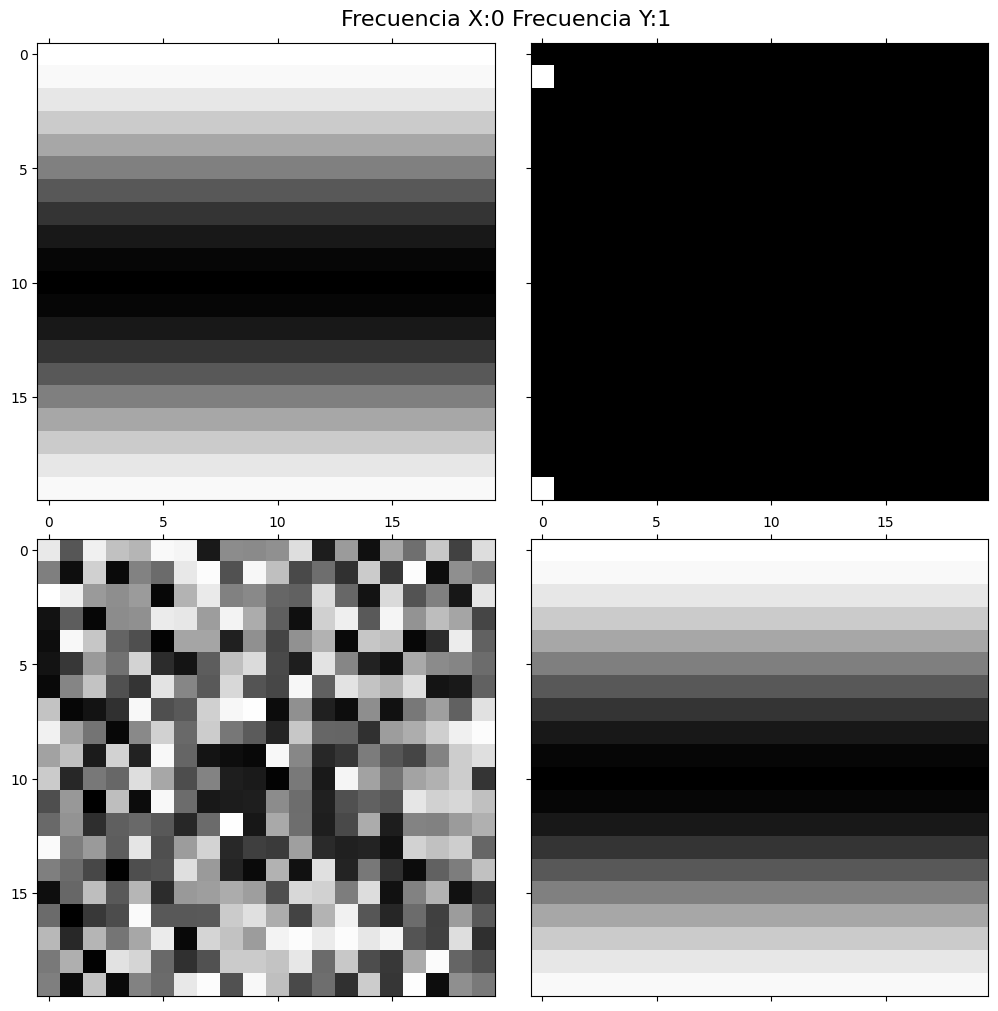

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle, line

# Tamaño de la imagen
dimensionImagen = 20

frecuenciaX = 0
frecuenciaY = 1

imagen = generateBaseImage((dimensionImagen,dimensionImagen), frecuenciaX, frecuenciaY)

mostrarDFTyIDFT(imagen, f"Frecuencia X:{frecuenciaX} Frecuencia Y:{frecuenciaY}")


## **De este momento a adelante pueden utlizar la implementacion de Sciyp de la transformada de Fourier:**


``` python
from scipy.fft import fft, ifft
y = fft(x)
yinv = ifft(y) # yinv = x
```



## Generar 10 imágenes y hacer la DFT y la IDFT de cada una









In [ ]:
from scipy.fft import fft2, ifft2

"""
Recuerden que DFT devuelve numeros complejos, en este caso querremos devolver 2
matrices, la primera contendra la magnitud del numero en la frecuencia y la segunda
contendra su angulo
"""
def DFT_2D(imagen):
   # Transformada de Fourier 2D
    F = fft2(imagen)
    # Magnitud y ángulo (fase)
    magnitud = np.abs(F)
    angulo = np.angle(F)
    return magnitud, angulo

def IDFT_2D(frecuenciasMagnitud, frecuenciasAngulo):
  # Reconstrucción en forma compleja
    F = frecuenciasMagnitud * np.exp(1j * frecuenciasAngulo)
    # Transformada Inversa
    imagen_rec = ifft2(F)
    # El resultado puede tener pequeñas partes imaginarias por error numérico → tomar parte real
    return np.real(imagen_rec)

(150, 150)


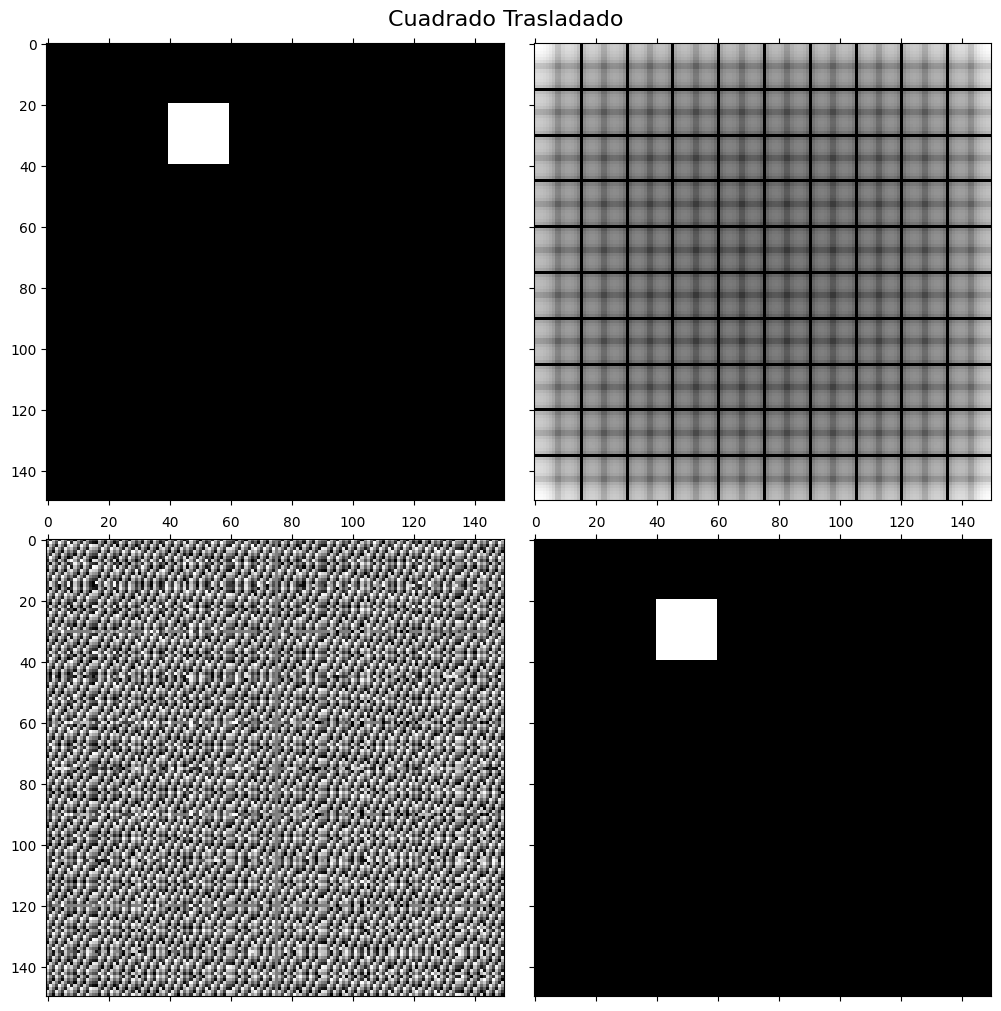

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle, line

# Tamaño de la imagen
dimensionImagen = 150

#### Cuadrado trasladado ####
imagenCuadradoTransladado = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = rectangle(start=(20, 40), extent=(20, 20))
imagenCuadradoTransladado[rr, cc] = 255
mostrarDFTyIDFT(imagenCuadradoTransladado, "Cuadrado Trasladado")



In [ ]:

#### Cuadrado central ####
imagenCuadradoCentral = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = rectangle(start=(65, 65), extent=(20, 20))
imagenCuadradoCentral[rr, cc] = 255
mostrarDFTyIDFT(imagenCuadradoCentral, "Cuadrado Central")


In [ ]:

#### Rectángulo ####
imagenRectangulo = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = rectangle(start=(30, 30), extent=(40, 20))  # ancho 40, alto 20
imagenRectangulo[rr, cc] = 255
mostrarDFTyIDFT(imagenRectangulo, "Rectángulo")


In [ ]:

#### 2 Rectángulos ####
imagenDosRectangulo = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = rectangle(start=(20, 20), extent=(20, 10))
imagenDosRectangulo[rr, cc] = 255
rr, cc = rectangle(start=(60, 60), extent=(20, 10))
imagenDosRectangulo[rr, cc] = 255
mostrarDFTyIDFT(imagenDosRectangulo, "2 Rectángulos")


In [ ]:

#### Línea vertical ####
imagenLineaVertical = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = line(20, 50, 80, 50)  # x constante → vertical
imagenLineaVertical[rr, cc] = 255
mostrarDFTyIDFT(imagenLineaVertical, "Línea Vertical")


In [ ]:

#### Línea 45° ####
imagenLinea45 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = line(20, 20, 80, 80)
imagenLinea45[rr, cc] = 255
mostrarDFTyIDFT(imagenLinea45, "Línea 45°")


In [ ]:

#### Línea horizontal (90°) ####
imagenLinea90 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
rr, cc = line(50, 10, 50, 90)  # y constante → horizontal
imagenLinea90[rr, cc] = 255
mostrarDFTyIDFT(imagenLinea90, "Línea Horizontal")


In [ ]:

#### Varias líneas verticales ####
imagenVariasLineas = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
for x in range(10, 90, 20):
    rr, cc = line(10, x, 90, x)
    imagenVariasLineas[rr, cc] = 255
mostrarDFTyIDFT(imagenVariasLineas, "Varias Líneas Verticales")


In [ ]:

#### Varias líneas 45° ####
imagenVariasLineas45 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
for offset in [0, 20, 40]:
    rr, cc = line(10, 10 + offset, 90, 90 + offset - 10)
    imagenVariasLineas45[rr, cc] = 255
mostrarDFTyIDFT(imagenVariasLineas45, "Varias Líneas 45°")


In [ ]:

#### Varias líneas horizontales ####
imagenVariasLineas90 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
for y in range(10, 90, 20):
    rr, cc = line(y, 10, y, 90)
    imagenVariasLineas90[rr, cc] = 255
mostrarDFTyIDFT(imagenVariasLineas90, "Varias Líneas Horizontales")

## Hacer la Transformada de Fourier de dos imágenes dadas (I1 e I2)

1.   Visualizar el módulo y la fase de cada una
2.   Realizar IDFS utilizando el modulo de I1 y la fase de I2
3.   Realizar IDFS utilizando el modulo de I2 y la fase de I1

Analizar el aporte del módulo y la fase en cada caso

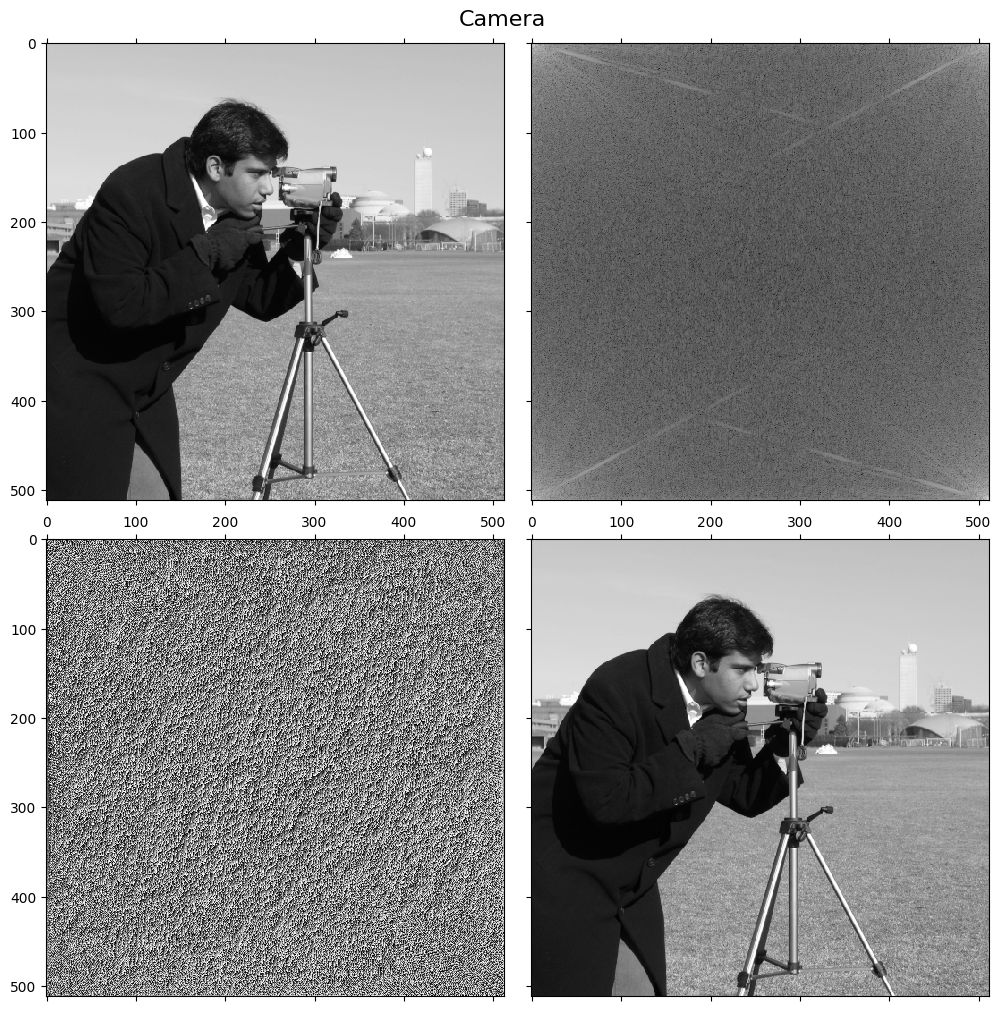

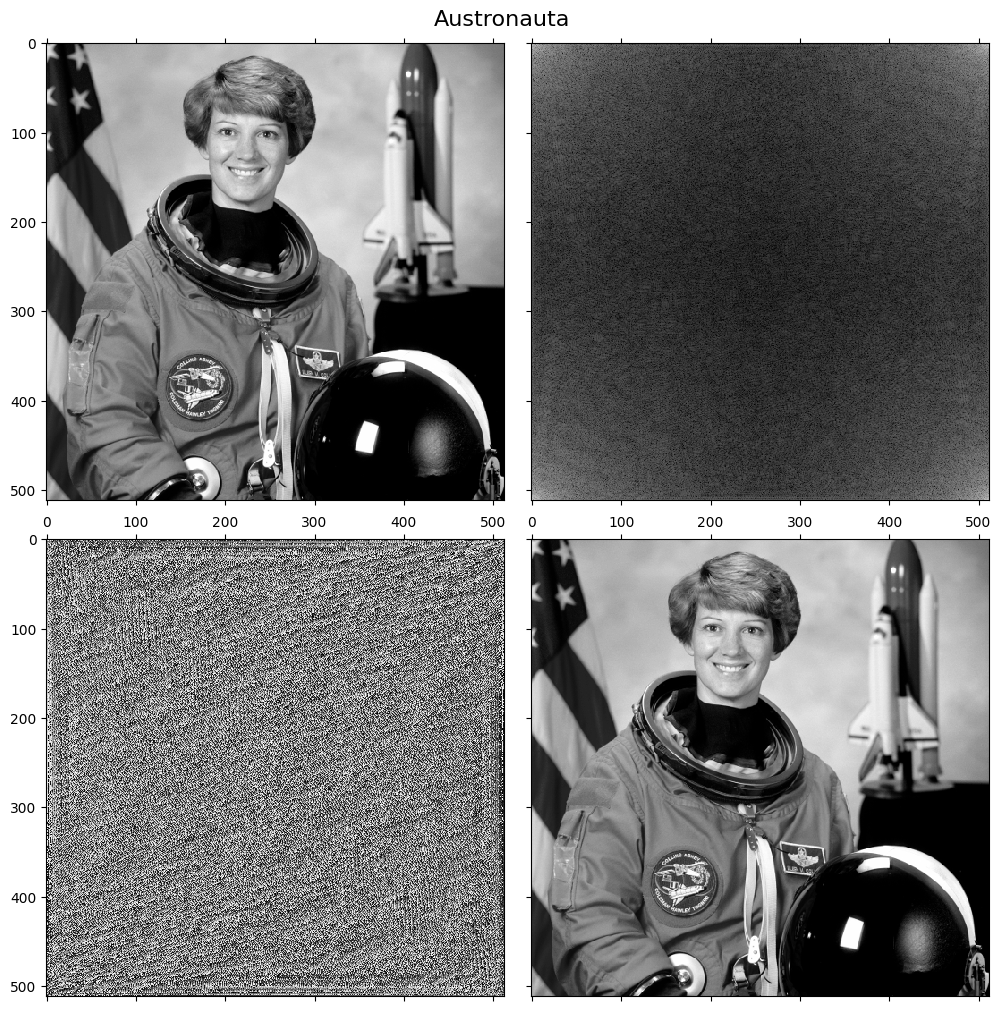

In [ ]:
imagenUno = data.camera()
imagenDos = color.rgb2gray(data.astronaut())

imagenDos = transform.resize(imagenDos, imagenUno.shape, anti_aliasing=True)


imagen1Modulo, imagen1Fase = DFT_2D(imagenUno)
mostrarDFTyIDFT(imagenUno, "Camera")

imagen2Modulo, imagen2Fase = DFT_2D(imagenDos)
mostrarDFTyIDFT(imagenDos, "Austronauta")


#fig, axes = plt.subplots(3, 3, figsize=(10, 10))

### COMPLETAR ###

fig.tight_layout()
plt.show()


### Componer una imagen con Cameraman y líneas horizontales (sumarlas), y remover las líneas usando la transformada de Fourier.

In [ ]:
# Abrir la imagen
# Agregan las lineas horizontales
# Realizan la transformacion de Fourier
# Analizen las funciones devueltas y piensen si pueden detectar que frecuencia estan asociadas a las lineas
# Eliminen las lineas
# Ploteen el resutado en un subplot de 3, 2. La primer fila mostrando la imagen original, las lineas por separado y la composicion
# La segunda fila mostrando la funcion el plano de modulo, fase y la imagen sin las lineas